# Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Model
from keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


We have seen 1D curve fitting, i.e. linear regression and non-linear regression, using very simple artificial neural networks. The other class of problem we want to solve is classification. Instead of going into examples of classification problems, we will mathematically model the data and feed it to our simple keras model. Then using the keras model we will genrate its predictions and study it.

To build our classification data we will first use the previous 1D example. The equation $y=mx+c$ represents a line. The inequality $y\ge mx+c$ is true for all geometric points that line on the line or the region above the line. For the first classification problem we will say that any point on the positive y side of the line will be classified as a $1$ and those on the negative side are classified as $-1$.

The function $z = f(x,y) = y - (mx+c)$ maps the 2D space onto our required classification. In the previous problem we mapped a 1D space onto another 1D space to fit a line, in this problem we need both $x$ and $y$ to classify a region in this mathematical space.

In [55]:
def f(X, Y):
    m, c = -2, 0.3
    return Y - m*X - c

All data acquired from real world processes contain noise and errors. Like before we will use a Gaussian random generator simulate normal noise.

In [56]:
def noise(shape):
    return np.random.normal(0, 0.1, shape)

In order to visualize the system that generates the data, lets explore the entire space of possibilities on a regular 2D mesh.

In [68]:
meshN = 100
xdom = np.linspace(-1, 1, meshN)
ydom = np.linspace(-1, 1, meshN)
X, Y = np.meshgrid(xdom, ydom)  # X, Y are now 2D matrices.
Z = np.sign(f(X, Y) + noise((meshN, meshN)))  # so is Z.
xtest = np.column_stack((xdom, ydom))

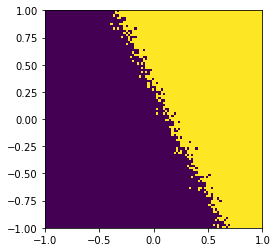

In [69]:
plt.imshow(Z, extent=[-1, 1, -1, 1], origin='lower')
# plt.plot(xdom, f(xdom, 0), 'g')  # plot the line
# plt.axis(aspect='image')
plt.show()

Let's also create some test data. The neural network will not learn from these examples and must correctly predict for them.

In [75]:
M = 1000
xt = np.random.random(M)*2 - 1
yt = np.random.random(M)*2 - 1
xtest = np.column_stack((xt,yt))

Let us now construct the training data from this system. The comments explain how the transformation works.

In [80]:
N = 1000  # no. of data points
x = np.random.random(N)*2 - 1  # random distribution of points on x-axis
y = np.random.random(N)*2 - 1  # random distribution of points on y-axis
z = f(x,y)+noise(N)  # z is 1D array containing corresponding measurement
gtx = x[z>=0]  # choosing the x values
gty = y[z>=0]  # and y values for which z > 0, i.e. points lying above the line
traingt = np.column_stack((gtx, gty, np.ones(gtx.size)))  # creating a 3 column table, third column = 1
ltx = x[z<0]  # similarly choosing x values
lty = y[z<0]  # and y values for points below
trainlt = np.column_stack((ltx, lty, -np.ones(ltx.size)))  # x and y columns, third column = -1
data = np.vstack((traingt, trainlt))  # combining the greater and lesser data
np.random.shuffle(data)  # randomizing the data for uniformity
xtrain = data[:, (0,1)]  # xtrain is now two columns, each row contain 2D coordinate for a point in the space.
ytrain = data[:, 2]  # ytrain is 1D, each value is a label or class of the corresponding point.

Plotting the constructed data, each point is coloured according to its labeled class

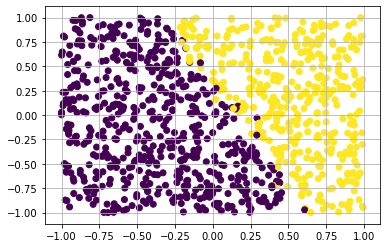

In [81]:
plt.scatter(xtrain[:,0], xtrain[:, 1], c=ytrain)
# plt.scatter(ltx, lty, color=ltz)
plt.grid()
plt.show()

Let us now define the keras neural network model. The function only takes the training inputs and labels, it fits the data on the model and returns the model. The model is ready for predicting on unknown inputs.

In [82]:
def linear_classifier(xtrain, ytrain):
    inp = Input(shape=(2,))
    # out = Dense(40, activation='relu')(inp)
    # out = Dense(10, activation='relu')(out)
    out = Dense(1, activation='linear')(inp)
    model = Model(inp, out)
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.fit(xtrain, ytrain, batch_size=1, epochs=10)
    return model

In [83]:
model = linear_classifier(xtrain, ytrain)

Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.4201 - mse: 0.4201
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3037 - mse: 0.3037
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3035 - mse: 0.3035
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3037 - mse: 0.3037
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3017 - mse: 0.3017
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3039 - mse: 0.3039
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3015 - mse: 0.3015
Epoch 8/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3039 - mse: 0.3039
Epoch 9/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3015 - mse: 0.3015
Epoch 10/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3040 - mse: 0.3040


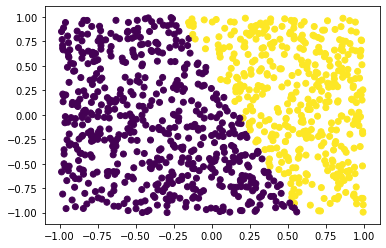

In [74]:
ytest = model.predict(xtest)
ytest.resize((M,))
ytest = np.sign(ytest)

plt.scatter(xt,yt, c=ytest)
# plt.scatter(ltx,lty)
plt.show()

The simple network was able to predict the correct classification of these points.

In [10]:
ytest.resize((1000,))
ytest.shape

(1000,)

## 2. Let's get non-linear

First we make a function to create the training data for us. We will only pass it x, y, and z as 1D vectors.

In [79]:
def generate_training_data(x, y, z):
    gtx = x[z>=0]
    gty = y[z>=0]
    traingt = np.column_stack((gtx, gty, np.ones(gtx.size)))
    ltx = x[z<0]
    lty = y[z<0]
    trainlt = np.column_stack((ltx, lty, -np.ones(ltx.size)))
    data = np.vstack((traingt, trainlt))
    np.random.shuffle(data)
    xtrain = data[:, (0,1)]
    ytrain = data[:, 2]
    return xtrain, ytrain

In [91]:
def quad(X, Y):
    return Y - (X-0.3)**2 + 0.1

In [92]:
meshN = 100
xdom = np.linspace(-1, 1, meshN)
ydom = np.linspace(-1, 1, meshN)
X, Y = np.meshgrid(xdom, ydom)  # X, Y are now 2D matrices.
Z = np.sign(quad(X, Y) + noise((meshN, meshN)))  # so is Z.
xtest = np.column_stack((xdom, ydom))

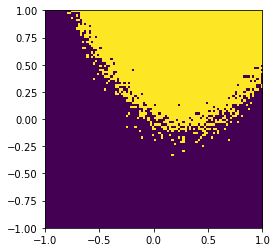

In [93]:
plt.imshow(Z, extent=[-1, 1, -1, 1], origin='lower')
# plt.plot(xdom, f(xdom, 0), 'g')  # plot the line
# plt.axis(aspect='image')
plt.show()

In [132]:
N = 1000  # no. of data points
x = np.random.random(N)*2 - 1  # random distribution of points on x-axis
y = np.random.random(N)*2 - 1  # random distribution of points on y-axis
z = quad(x,y)+noise(N)  # z is 1D array containing corresponding measurement
xtrain, ytrain = generate_training_data(x, y, z)

In [105]:
model = linear_classifier(xtrain, ytrain)

Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3221 - mse: 0.3221
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2530 - mse: 0.2530
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2332 - mse: 0.2332
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2208 - mse: 0.2208
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2086 - mse: 0.2086
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1980 - mse: 0.1980
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1866 - mse: 0.1866
Epoch 8/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1823 - mse: 0.1823
Epoch 9/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1739 - mse: 0.1739
Epoch 10/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1664 - mse: 0.1664


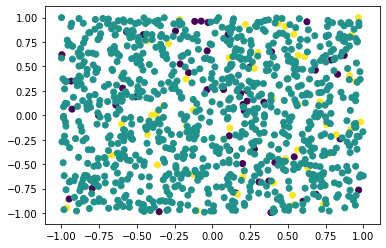

In [106]:
ytest = model.predict(xtest)
ytest.resize((M,))
ytest = np.sign(ytest)

plt.scatter(xt,yt, c=ytest)
# plt.scatter(ltx,lty)
plt.show()

As we can see here, the linear classifier doesn't work on the data from the quadratic model.

So let's then modify our keras model to support non-linearity in the data.

In [128]:
def non_linear_classifier(xtrain, ytrain):
    inp = Input(shape=(2,))
    lay = Dense(40, activation='relu')(inp)
    lay = Dense(10, activation='relu')(lay)
    out = Dense(1, activation='linear')(lay)
    model = Model(inp, out)
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.fit(xtrain, ytrain, batch_size=1, epochs=40)
    return model

In [129]:
model = non_linear_classifier(xtrain, ytrain)

Epoch 1/40
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2843 - mse: 0.2843
Epoch 2/40
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2035 - mse: 0.2035A: 0s - loss: 0.2127 - ms
Epoch 3/40
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1998 - mse: 0.1998
Epoch 4/40
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1897 - mse: 0.1897
Epoch 5/40
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1789 - mse: 0.1789
Epoch 6/40
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1699 - mse: 0.1699
Epoch 7/40
   1/1000 [..............................] - ETA: 15s - loss: 2.0844 - mse: 2.0844

KeyboardInterrupt: 

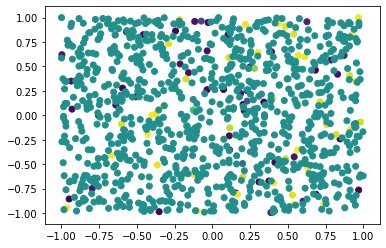

In [127]:
ytest = model.predict(xtest)
ytest.resize((M,))
# ytest = np.sign(ytest)

plt.scatter(xt,yt, c=ytest)
# plt.scatter(ltx,lty)
plt.show()